### Notebook to iterate through Decision Tree Model

In [79]:
# import libraries
import pandas as pd
pd.options.display.max_columns = 50
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import sklearn
from sklearn.preprocessing import StandardScaler, binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# add import for Decision Treees
from sklearn.feature_selection import RFECV, SelectKBest, f_regression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import pickle

from imblearn.over_sampling import SMOTE

In [2]:
# loading in cleaned dataset
model_df = pd.read_csv('model_data.csv', index_col = 0)

In [3]:
model_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,2,3,3,1,4,Returning_Visitor,True,False


### Creating Dummy Columsn from Categorical Variables

In [4]:
model_df = pd.get_dummies(model_df, columns=['SpecialDay', 'Month', 'OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend'])

In [5]:
model_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Month_2,Month_3,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,...,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,False,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Dummying 'Revenue' Target

In [6]:
model_df['Revenue'] = model_df['Revenue'].astype(int)

In [7]:
model_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,Revenue,SpecialDay_0.0,SpecialDay_0.2,SpecialDay_0.4,SpecialDay_0.6,SpecialDay_0.8,SpecialDay_1.0,Month_2,Month_3,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,...,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1


### Train-Test Split

In [8]:
# Split data to be used in the models
X = model_df.drop('Revenue', axis = 1)

# Create target variable
y = model_df['Revenue'] # y is the column we're trying to predict

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)

## Dummy Classifier for a Basline Assessment

In [10]:
from sklearn.dummy import DummyClassifier

# DummyClassifier to predict only target 0
dummy = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
dummy_pred = dummy.predict(X_test)

# most_frequent: predict using the most frequent

In [11]:
# checking F1
print('Test F1 score: ', f1_score(y_test, dummy_pred))
# checking Recall
print('Test Recall score: ', recall_score(y_test, dummy_pred))
# checking Accuracy
print('Test Accuracy score: ', accuracy_score(y_test, dummy_pred))

Test F1 score:  0.0
Test Recall score:  0.0
Test Accuracy score:  0.8400908206292572


The F1 and Recall would be obviously be 0 because it's not meant to perform on real data, simply to compare with other models.

The Accuracy is only so high because it reflects the huge class imbalance. So we'll have to fix that

## Baseline Decision Tree
Creating a baseline model before fixing class imbalance.

In [12]:
baseline_tree = DecisionTreeClassifier()
baseline_tree = baseline_tree.fit(X_train, y_train)

In [13]:
# predict the training set
tree_y_pred_train = baseline_tree.predict(X_train)

# predict for test set
tree_y_pred_test = baseline_tree.predict(X_test)

In [14]:
print('Baseline Decision Tree Model')
print("Training F1 Score: ", metrics.f1_score(y_train, tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(y_train, tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(y_test, tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(y_test, tree_y_pred_test))

Baseline Decision Tree Model
Training F1 Score:  1.0
Training Recall:  1.0
Testing F1 Score:  0.5775075987841944
Testing Recall:  0.5780933062880325


## 'Real' Model Iterations


Decided not use a scaler, because Decision Trees don't need that
(I checked that scores didn't change when i removed the scaler)

In [15]:
# # adding scaler
# scaler = StandardScaler()  
# scaler.fit(X_train)

# X_train = scaler.transform(X_train)  
# X_test = scaler.transform(X_test)

### Creating Decision Tree model without tuning with Grid Search

In [16]:
first_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6)
first_tree = first_tree.fit(X_train, y_train)

In [17]:
# predict the training set
first_tree_y_pred_train = first_tree.predict(X_train)
# predict for test set
first_tree_y_pred_test = first_tree.predict(X_test)

In [18]:
print('First Decision Tree Model')
print("Training F1 Score: ", metrics.f1_score(y_train, first_tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(y_train, first_tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(y_test, first_tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(y_test, first_tree_y_pred_test))

First Decision Tree Model
Training F1 Score:  0.6878264363198072
Training Recall:  0.6049469964664311
Testing F1 Score:  0.6372093023255814
Testing Recall:  0.5557809330628803


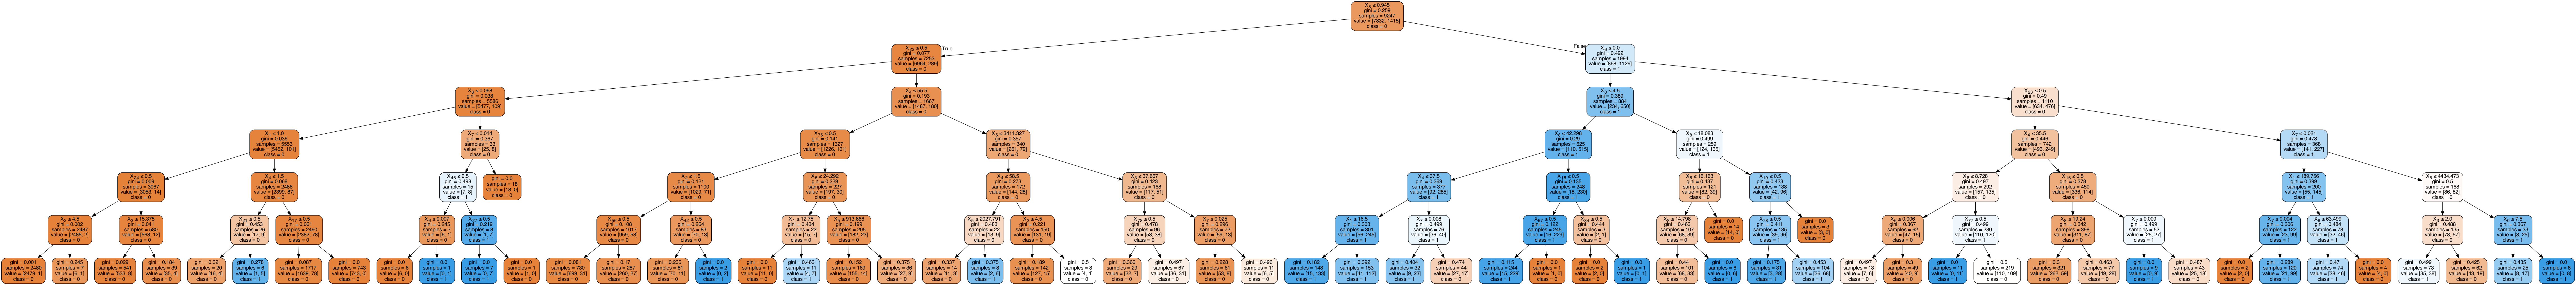

In [19]:
# Visualizing this Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(first_tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('visualizations/first_tree_depth6.png')
Image(graph.create_png())

### Let's restrict the depth even more, so it's not as overfit.


In [20]:
# creating decision tree with max_depts=3
depth_3_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6)
depth_3_tree = depth_3_tree.fit(X_train, y_train)

# predict the training set
second_tree_y_pred_train = depth_3_tree.predict(X_train)
# predict for test set
second_tree_y_pred_test = depth_3_tree.predict(X_test)

In [21]:
print('Baseline Decision Tree Model with max_depth reduced from 6 to 3:')
print("Training F1 Score: ", metrics.f1_score(y_train, second_tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(y_train, second_tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(y_test, second_tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(y_test, second_tree_y_pred_test))

Baseline Decision Tree Model with max_depth reduced from 6 to 3:
Training F1 Score:  0.6878264363198072
Training Recall:  0.6049469964664311
Testing F1 Score:  0.6372093023255814
Testing Recall:  0.5557809330628803


Testing scores don't change!
### Trying out SMOTE to fix class imbalance

In [22]:
sm = SMOTE(random_state=23)
smote_X_train, smote_y_train = sm.fit_sample(X_train, y_train)
smote_X_test, smote_y_test = sm.fit_sample(X_test, y_test)

In [23]:
# creating decision tree with max_depts=3
smote_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6)
smote_tree = smote_tree.fit(smote_X_train, smote_y_train)

# predict the training set
smote_tree_y_pred_train = depth_3_tree.predict(smote_X_train)
# predict for test set
smote_tree_y_pred_test = depth_3_tree.predict(smote_X_test)

In [24]:
print('Baseline Decision Tree Model using Smote to upsample the minority')
print("Training F1 Score: ", metrics.f1_score(smote_y_train, smote_tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(smote_y_train, smote_tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(smote_y_test, smote_tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(smote_y_test, smote_tree_y_pred_test))

Baseline Decision Tree Model using Smote to upsample the minority
Training F1 Score:  0.6704104385168056
Training Recall:  0.5182584269662921
Testing F1 Score:  0.6384166455214413
Testing Recall:  0.4857142857142857


It looks like it got worse? but we need to confirm that i used smote correctly here
## Let's try using `class_weight='balanced'` instead

In [25]:
# creating decision tree with max_depts=3
balanced_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6, class_weight='balanced')
balanced_tree = balanced_tree.fit(X_train, y_train)

# predict the training set
balanced_tree_y_pred_train = balanced_tree.predict(X_train)
# predict for test set
balanced_tree_y_pred_test = balanced_tree.predict(X_test)

In [26]:
print('Balanced DT using class_weight:')
print("Training F1 Score: ", metrics.f1_score(y_train, balanced_tree_y_pred_train))
print("Training Recall: ", metrics.recall_score(y_train, balanced_tree_y_pred_train))

print("Testing F1 Score: ", metrics.f1_score(y_test, balanced_tree_y_pred_test))
print("Testing Recall: ", metrics.recall_score(y_test, balanced_tree_y_pred_test))

Balanced DT using class_weight:
Training F1 Score:  0.6587552742616034
Training Recall:  0.8826855123674912
Testing F1 Score:  0.6391096979332274
Testing Recall:  0.8154158215010142


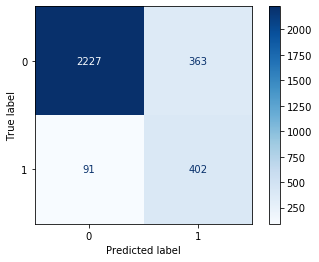

In [62]:
plot_confusion_matrix(balanced_tree, X_test, y_test, cmap=plt.cm.Blues)

Wow it performs so much better! Let's run a decision tree model with grid search now.

## Creating tuned Decision Tree Model with Grid Search

In [27]:
grid_tree = DecisionTreeClassifier(random_state=3, criterion='gini', class_weight='balanced')

In [28]:
param_dict={'max_depth': range(2,15,1), 
            'max_leaf_nodes': range(2,30,2),
            'min_samples_split': range(2,4,1)}

In [32]:
grid_tree = GridSearchCV(grid_tree, param_dict, cv=5, scoring='f1', verbose=1)

In [33]:
grid_tree.fit(X_train, y_train)

Fitting 5 folds for each of 364 candidates, totalling 1820 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1820 out of 1820 | elapsed:  1.1min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=3),
             param_grid={'max_depth': range(2, 15),
                         'max_leaf_nodes': range(2, 30, 2),
                         'min_samples_split': range(2, 4)},
             scoring='f1', verbose=1)

In [34]:
# examine the best model
# Best F1 scoree achieved across all params
print('F1 Score:', grid_tree.best_score_)

# Checking dictionary showing the best hyperparameters used to generate that score
print('Best Hyperparameters:', grid_tree.best_params_)

# Actual model object fit with those best parameters
# also shows default parameters that we did not specify
print('Model object with best parameters: ')
print(grid_tree.best_estimator_)

F1 Score: 0.6589754820496825
Best Hyperparameters: {'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_split': 2}
Model object with best parameters: 
DecisionTreeClassifier(class_weight='balanced', max_depth=2, max_leaf_nodes=2,
                       random_state=3)


In [35]:
# Predict the response for test dataset
tuned_tree_y_pred_train = grid_tree.best_estimator_.predict(X_train)

# predict the training set
tuned_tree_y_pred_test = grid_tree.best_estimator_.predict(X_test)

# Model F1, how often is the classifier correct?
print('Tuned Decision Tree Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))

Tuned Decision Tree Model Predictions
F1 on train set: 0.6589394378441031
F1 on test set: 0.6762225969645868


In [36]:
print('Untuned Weighted Decision Tree Model Predictions')
print("Training F1 Score: ", metrics.f1_score(y_train, balanced_tree_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, balanced_tree_y_pred_test))
print('')
print("Training Recall: ", metrics.recall_score(y_train, balanced_tree_y_pred_train))
print("Testing Recall: ", metrics.recall_score(y_test, balanced_tree_y_pred_test))
print('')
print('Grid Search Decision Tree Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))
print('')
print("Recall on train set: ", metrics.recall_score(y_train, tuned_tree_y_pred_train))
print("Recall on test set: ", metrics.recall_score(y_test, tuned_tree_y_pred_test))

Untuned Weighted Decision Tree Model Predictions
Training F1 Score:  0.6587552742616034
Testing F1 Score:  0.6391096979332274

Training Recall:  0.8826855123674912
Testing Recall:  0.8154158215010142

Grid Search Decision Tree Model Predictions
F1 on train set: 0.6589394378441031
F1 on test set: 0.6762225969645868

Recall on train set:  0.8035335689045936
Recall on test set:  0.8133874239350912


- This grid search Decision Tree achieved a F1 of .67 and Recall of .80
- It could be better, but it's pretty good so far

### Let's look at the TPR and FNR on a confusion matrix

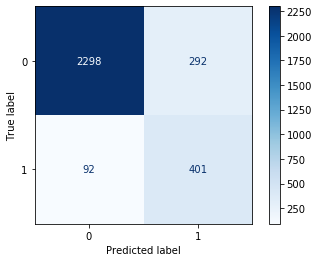

In [37]:
plot_confusion_matrix(grid_tree, X_test, y_test, cmap=plt.cm.Blues)

It looks like there's still a high amount of false negatives (97). Let's keep trying to imporove that.

## Random Forest with Grid Search

In [38]:
rfc = RandomForestClassifier(random_state = 5, criterion='gini' , class_weight='balanced', warm_start=True)

In [39]:
# creating our parameters to test
rfc_param_dict={'n_estimators':[50,100],
            'max_depth': list(range(2,20)), 
            'max_features': list(range(5,30))
            }

In [40]:
# create a grid search object and fit it to the data
grid_forest = GridSearchCV(rfc, rfc_param_dict, cv=5, scoring='f1', verbose=1, n_jobs=2)

In [41]:
grid_forest.fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    6.5s
[Parallel(n_jobs=2)]: Done 196 tasks      | elapsed:   27.0s
[Parallel(n_jobs=2)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=2)]: Done 796 tasks      | elapsed:  2.2min
[Parallel(n_jobs=2)]: Done 1246 tasks      | elapsed:  4.0min
[Parallel(n_jobs=2)]: Done 1796 tasks      | elapsed:  6.5min
[Parallel(n_jobs=2)]: Done 2446 tasks      | elapsed: 10.1min
[Parallel(n_jobs=2)]: Done 3196 tasks      | elapsed: 14.7min
[Parallel(n_jobs=2)]: Done 4046 tasks      | elapsed: 20.4min
[Parallel(n_jobs=2)]: Done 4500 out of 4500 | elapsed: 23.6min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=5, warm_start=True),
             n_jobs=2,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'max_features': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,
                                          16, 17, 18, 19, 20, 21, 22, 23, 24,
                                          25, 26, 27, 28, 29],
                         'n_estimators': [50, 100]},
             scoring='f1', verbose=1)

In [42]:
print(grid_forest.best_score_)
print(grid_forest.best_params_)
print(grid_forest.best_estimator_)

0.682534709802286
{'max_depth': 12, 'max_features': 22, 'n_estimators': 50}
RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=22,
                       n_estimators=50, random_state=5, warm_start=True)


In [43]:
# Predict the response for test dataset
forest_y_pred_train = grid_tree.best_estimator_.predict(X_train)
# predict the training set
forest_y_pred_test = grid_tree.best_estimator_.predict(X_test)

In [44]:
# Model F1, how often is the classifier correct?
print("F1 on train set: ",metrics.f1_score(y_train, forest_y_pred_train))
print("F1 on test set: ",metrics.f1_score(y_test, forest_y_pred_test))

F1 on train set:  0.6589394378441031
F1 on test set:  0.6762225969645868


### Comparing all the 'best' models so far

In [45]:
print('Untuned Weighted Decision Tree Model Predictions')
print("Training F1 Score: ", metrics.f1_score(y_train, balanced_tree_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, balanced_tree_y_pred_test))
print('')
print("Training Recall: ", metrics.recall_score(y_train, balanced_tree_y_pred_train))
print("Testing Recall: ", metrics.recall_score(y_test, balanced_tree_y_pred_test))
print('')
print('Grid Search Decision Tree Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))
print('')
print("Recall on train set: ", metrics.recall_score(y_train, tuned_tree_y_pred_train))
print("Recall on test set: ", metrics.recall_score(y_test, tuned_tree_y_pred_test))
print('')
print('Random Forest Predictions')
print("F1 on train set:",metrics.f1_score(y_train, forest_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, forest_y_pred_test))
print('')
print("Recall on train set: ", metrics.recall_score(y_train, forest_y_pred_train))
print("Recall on test set: ", metrics.recall_score(y_test, forest_y_pred_test))

Untuned Weighted Decision Tree Model Predictions
Training F1 Score:  0.6587552742616034
Testing F1 Score:  0.6391096979332274

Training Recall:  0.8826855123674912
Testing Recall:  0.8154158215010142

Grid Search Decision Tree Model Predictions
F1 on train set: 0.6589394378441031
F1 on test set: 0.6762225969645868

Recall on train set:  0.8035335689045936
Recall on test set:  0.8133874239350912

Random Forest Predictions
F1 on train set: 0.6589394378441031
F1 on test set: 0.6762225969645868

Recall on train set:  0.8035335689045936
Recall on test set:  0.8133874239350912


For some reason the Decision Tree is performing exactly the same as the Random Forest Model.

## Feature Selection

Let's run Recursive Feature Elimination (RFECV) on the untuned weighted decision tree

In [46]:
# creating decision tree with max_depts=3
# selection_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6, class_weight='balanced')

# # predict the training set
# balanced_tree_y_pred_train = balanced_tree.predict(X_train)
# # predict for test set
# balanced_tree_y_pred_test = balanced_tree.predict(X_test)

In [47]:
# Create recursive feature eliminator that scores features by f1 score
selector = RFECV(estimator=selection_tree, step=1, cv=5, scoring='f1', n_jobs=-1)

# Fit recursive feature eliminator 
selector.fit(X_train, y_train)

RFECV(cv=5,
      estimator=DecisionTreeClassifier(class_weight='balanced', max_depth=6,
                                       random_state=3),
      n_jobs=-1, scoring='f1')

In [59]:
selected_rfe = X_train.columns[selector.support_]
removed_rfe = X_train.columns[~selector.support_]

In [60]:
#instantiate a decision tree object
selection_tree = DecisionTreeClassifier(random_state=3, criterion='gini', max_depth=6, class_weight='balanced')

#fit the linear regression to the data
selection_tree = selection_tree.fit(X_train[selected_rfe], y_train)

y_rfe = selection_tree.predict(X_train[selected_rfe])
trainRFE_f1 = np.sqrt(metrics.f1_score(y_train, y_rfe))
print('Training F1:' , trainRFE_f1)

y_pred_rfe = selection_tree.predict(X_test[selected_rfe])
testRFE_f1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rfe))
print('Testing F1:' , testRFE_f1)

# looking at recall 
trainRFE_recall = np.sqrt(metrics.recall_score(y_train, y_rfe))
print('Training Recall:' , trainRFE_recall)
testRFE_recall = np.sqrt(metrics.recall_score(y_test, y_pred_rfe))
print('Testing Recall:' , testRFE_recall)

Training F1: 0.8180638700115461
Testing F1: 0.3501540368141469
Training Recall: 0.8944271909999159
Testing Recall: 0.8939735124563987


oops this made the model super overfit on the F1, but it performed normally when measured with Recall!


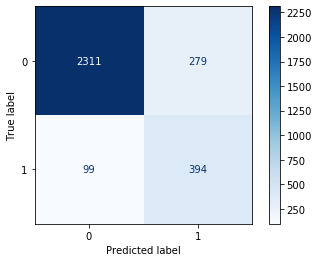

In [61]:
plot_confusion_matrix(selection_tree, X_test[selected_rfe], y_test, cmap=plt.cm.Blues)

In [65]:
# comparing all the models again

print('Untuned Weighted Decision Tree Model Predictions')
print("Training F1 Score: ", metrics.f1_score(y_train, balanced_tree_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(y_test, balanced_tree_y_pred_test))
print('')
print("Training Recall: ", metrics.recall_score(y_train, balanced_tree_y_pred_train))
print("Testing Recall: ", metrics.recall_score(y_test, balanced_tree_y_pred_test))
print('')
print('Grid Search Decision Tree Model Predictions')
print("F1 on train set:",metrics.f1_score(y_train, tuned_tree_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, tuned_tree_y_pred_test))
print('')
print("Recall on train set: ", metrics.recall_score(y_train, tuned_tree_y_pred_train))
print("Recall on test set: ", metrics.recall_score(y_test, tuned_tree_y_pred_test))
print('')
print('Random Forest Predictions')
print("F1 on train set:",metrics.f1_score(y_train, forest_y_pred_train))
print("F1 on test set:",metrics.f1_score(y_test, forest_y_pred_test))
print('')
print("Recall on train set: ", metrics.recall_score(y_train, forest_y_pred_train))
print("Recall on test set: ", metrics.recall_score(y_test, forest_y_pred_test))
print('')
print('RFE (Feature Selection) on Untuned Tree:')
print("F1 on train set:", trainRFE_f1)
print("F1 on test set:", testRFE_f1)
print('')
print("Recall on train set: ", trainRFE_recall)
print("Recall on test set: ", testRFE_recall)

Untuned Weighted Decision Tree Model Predictions
Training F1 Score:  0.6587552742616034
Testing F1 Score:  0.6391096979332274

Training Recall:  0.8826855123674912
Testing Recall:  0.8154158215010142

Grid Search Decision Tree Model Predictions
F1 on train set: 0.6589394378441031
F1 on test set: 0.6762225969645868

Recall on train set:  0.8035335689045936
Recall on test set:  0.8133874239350912

Random Forest Predictions
F1 on train set: 0.6589394378441031
F1 on test set: 0.6762225969645868

Recall on train set:  0.8035335689045936
Recall on test set:  0.8133874239350912

RFE (Feature Selection) on Untuned Tree:
F1 on train set: 0.8180638700115461
F1 on test set: 0.3501540368141469

Recall on train set:  0.8944271909999159
Recall on test set:  0.8939735124563987


## Looking at Feature Importance

In [70]:
# function to generate feature selection plot for any graph
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + 'FEATURE IMPORTANCE')
    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')

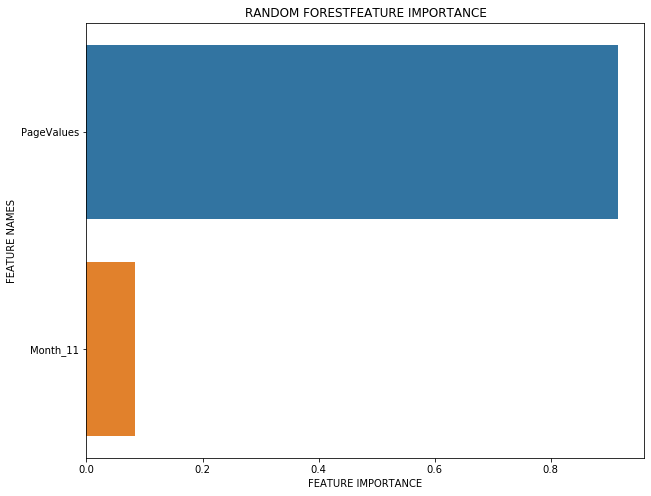

In [74]:
plot_feature_importance(selection_tree.feature_importances_,X_train[selected_rfe].columns,'RANDOM FOREST')

It looks like the Feature Selection model only kept these 2 features?

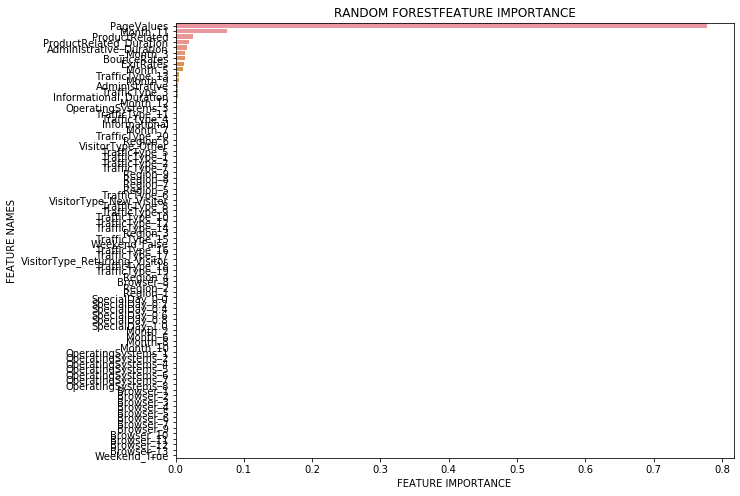

In [77]:
plot_feature_importance(balanced_tree.feature_importances_,X_train.columns,'RANDOM FOREST')